<a href="https://colab.research.google.com/github/mbbspbr/Pruebas/blob/master/Ejercicio_Clasificacion_Aleatoria_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10. Datos para entrenar redes neuronales
[**Python Deep Learning** Introducción práctica con Keras y TensorFlow 2. Jordi Torres. Editorial Marcombo ISBN: 9788426728289 ](https://www.marcombo.com/python-deep-learning-9788426728289/)

### Datos

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
import tensorflow as tf

In [0]:
!nvidia-smi

Fri Apr 24 22:02:45 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/My\ Drive

/content/drive/My Drive


In [0]:
cd Base1

/content/drive/My Drive/Base1


In [0]:
import os

In [0]:

base_dir = '.'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training 
train_label_1_dir = os.path.join(train_dir, 'label_1')
train_label_2_dir = os.path.join(train_dir, 'label_2')

# Directorio con las imagenes de validation
validation_label_1_dir = os.path.join(validation_dir, 'label_1')
validation_label_2_dir = os.path.join(validation_dir, 'label_2')

# Directorio con las imagenes de test
test_label_1_dir = os.path.join(test_dir, 'label_1')
test_label_2_dir = os.path.join(test_dir, 'label_2')



In [0]:
train_label_1_fnames = os.listdir( train_label_1_dir )
print(train_label_1_fnames[:5])

train_label_2_fnames = os.listdir( train_label_2_dir )
print(train_label_2_fnames[:5])

validation_label_1_fnames = os.listdir( validation_label_1_dir )
print(validation_label_1_fnames[:5])

validation_label_2_fnames = os.listdir( validation_label_2_dir )
print(validation_label_2_fnames[:5])

test_label_1_fnames = os.listdir( test_label_1_dir )
print(test_label_1_fnames[:5])

test_label_2_fnames = os.listdir( test_label_2_dir )
print(test_label_2_fnames[:5])


['train_label_1_ 0.jpeg', 'train_label_1_ 1.jpeg', 'train_label_1_ 2.jpeg', 'train_label_1_ 3.jpeg', 'train_label_1_ 4.jpeg']
['train_label_2_ 201.jpeg', 'train_label_2_ 202.jpeg', 'train_label_2_ 203.jpeg', 'train_label_2_ 204.jpeg', 'train_label_2_ 205.jpeg']
['val_label_1_ 100.jpeg', 'val_label_1_ 101.jpeg', 'val_label_1_ 102.jpeg', 'val_label_1_ 103.jpeg', 'val_label_1_ 104.jpeg']
['val_label_2_ 301.jpeg', 'val_label_2_ 302.jpeg', 'val_label_2_ 303.jpeg', 'val_label_2_ 304.jpeg', 'val_label_2_ 305.jpeg']
['test_label_1_ 151.jpeg', 'test_label_1_ 152.jpeg', 'test_label_1_ 153.jpeg', 'test_label_1_ 154.jpeg', 'test_label_1_ 155.jpeg']
['test_label_2_ 351.jpeg', 'test_label_2_ 352.jpeg', 'test_label_2_ 353.jpeg', 'test_label_2_ 354.jpeg', 'test_label_2_ 355.jpeg']


In [0]:
print('total training label_1 images :', len(os.listdir(train_label_1_dir ) ))
print('total training label_2 images :', len(os.listdir(train_label_2_dir ) ))

print('total validation label_1 images :', len(os.listdir( validation_label_1_dir ) ))
print('total validation label_2 images :', len(os.listdir( validation_label_2_dir ) ))

print('total test label_1 images :', len(os.listdir( test_label_1_dir ) ))
print('total test label_2 images :', len(os.listdir( test_label_2_dir ) ))


total training label_1 images : 100
total training label_2 images : 100
total validation label_1 images : 51
total validation label_2 images : 50
total test label_1 images : 50
total test label_2 images : 49


In [0]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def print_pictures(dir, fnames):
  # presentaremos images en una configuración de 4x4
  nrows = 4
  ncols = 4

  pic_index = 0 # Índice para iterar sobre las imagenes

  fig = plt.gcf()
  fig.set_size_inches(ncols*4, nrows*4)

  pic_index+=8

  next_pix = [os.path.join(dir, fname) 
                for fname in fnames[ pic_index-8:pic_index] 
               ]

  for i, img_path in enumerate(next_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

  plt.show()

  
print("Label 1 Train")
print_pictures(train_label_1_dir, train_label_1_fnames)
print("Label_2 Train")
print_pictures(train_label_2_dir, train_label_2_fnames)
print("Label 1 Validation")
print_pictures(validation_label_1_dir, validation_label_1_fnames)
print("Label 2 Validation")
print_pictures(validation_label_2_dir, validation_label_2_fnames)
print("Label 1 Test")
print_pictures(test_label_1_dir, test_label_1_fnames)
print("Label 2 Test")
print_pictures(test_label_2_dir, test_label_2_fnames)

## Modelo básico

In [0]:
import tensorflow as tf
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics = ['acc'])


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                      batch_size=100,
                                                      class_mode  = 'binary',
                                                      target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=100,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))                                                    



Found 200 images belonging to 2 classes.
Found 101 images belonging to 2 classes.
Found 99 images belonging to 2 classes.


In [0]:
batch_size = 100
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)


2
1


In [0]:
history = model.fit(
      train_generator,
      steps_per_epoch= steps_per_epoch,  
      epochs=10,
      validation_data=validation_generator,
      validation_steps= validation_steps,  
      verbose=2)



Epoch 1/10
2/2 - 50s - loss: 0.8261 - acc: 0.4400 - val_loss: 0.6925 - val_acc: 0.5000
Epoch 2/10
2/2 - 1s - loss: 0.6872 - acc: 0.5000 - val_loss: 0.6773 - val_acc: 0.5600
Epoch 3/10
2/2 - 1s - loss: 0.6937 - acc: 0.5100 - val_loss: 0.6819 - val_acc: 0.4900
Epoch 4/10
2/2 - 1s - loss: 0.7008 - acc: 0.4100 - val_loss: 0.6681 - val_acc: 0.5000
Epoch 5/10
2/2 - 1s - loss: 0.6662 - acc: 0.4400 - val_loss: 0.6398 - val_acc: 0.5100
Epoch 6/10
2/2 - 1s - loss: 0.6091 - acc: 0.7750 - val_loss: 0.5948 - val_acc: 0.5100
Epoch 7/10
2/2 - 1s - loss: 0.6208 - acc: 0.4900 - val_loss: 0.6956 - val_acc: 0.5000
Epoch 8/10
2/2 - 1s - loss: 0.6412 - acc: 0.5000 - val_loss: 0.5579 - val_acc: 0.5100
Epoch 9/10
2/2 - 1s - loss: 0.5069 - acc: 0.8250 - val_loss: 0.4681 - val_acc: 1.0000
Epoch 10/10
2/2 - 1s - loss: 0.4486 - acc: 0.9950 - val_loss: 0.6725 - val_acc: 0.5000


In [0]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


<Figure size 432x288 with 0 Axes>

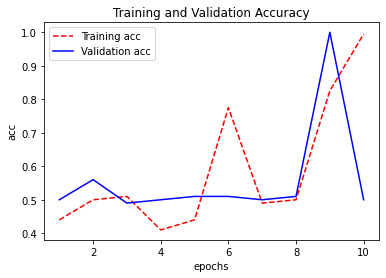

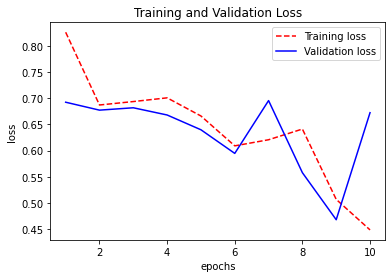

<Figure size 432x288 with 0 Axes>

In [0]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

plt.plot  ( epochs, acc,'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs, loss, 'r--', label='Training loss'  )
plt.plot  ( epochs, val_loss ,  'b', label='Validation loss' )
plt.title ('Training and Validation Loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()




In [0]:
test_lost, test_acc= model.evaluate(test_generator,steps=20)
print ("Test Accuracy:", test_acc)

20/20 [==============================] - 4s 191ms/step - loss: 0.6732 - acc: 0.4949
Test Accuracy: 0.49494948983192444


In [0]:
history_dict = history.history
print(history_dict.keys())


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Saving Wiliams-foto1.png to Wiliams-foto1 (4).png
[[8.649538e-36]]


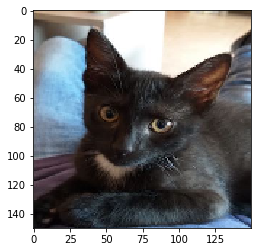

Wiliams-foto1.png IS A DOG


In [0]:
import numpy as np

from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded=files.upload()
file=list(uploaded.keys())[0]

path='/content/' + file
img=image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
image=np.expand_dims(x, axis=0)  

classes = model.predict(image)
print(classes)

plt.imshow(img)
plt.show()

if classes>0: print( fn + " IS A DOG")
else: print( fn + " IS A CAT")